In [2]:
import  matplotlib.pyplot  as plt   
import pandas as pd   


In [3]:
df=pd.ExcelFile(r'C:\Users\saurabh\Documents\Desktop\AirQualityUCI\AirQualityUCI.xlsx').parse(skiprows=0)
df=df[df['CO(GT)']>0]
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [14]:
list(df.iloc[[6,11,17,23]]['Time'])


[datetime.time(0, 0),
 datetime.time(6, 0),
 datetime.time(12, 0),
 datetime.time(18, 0)]

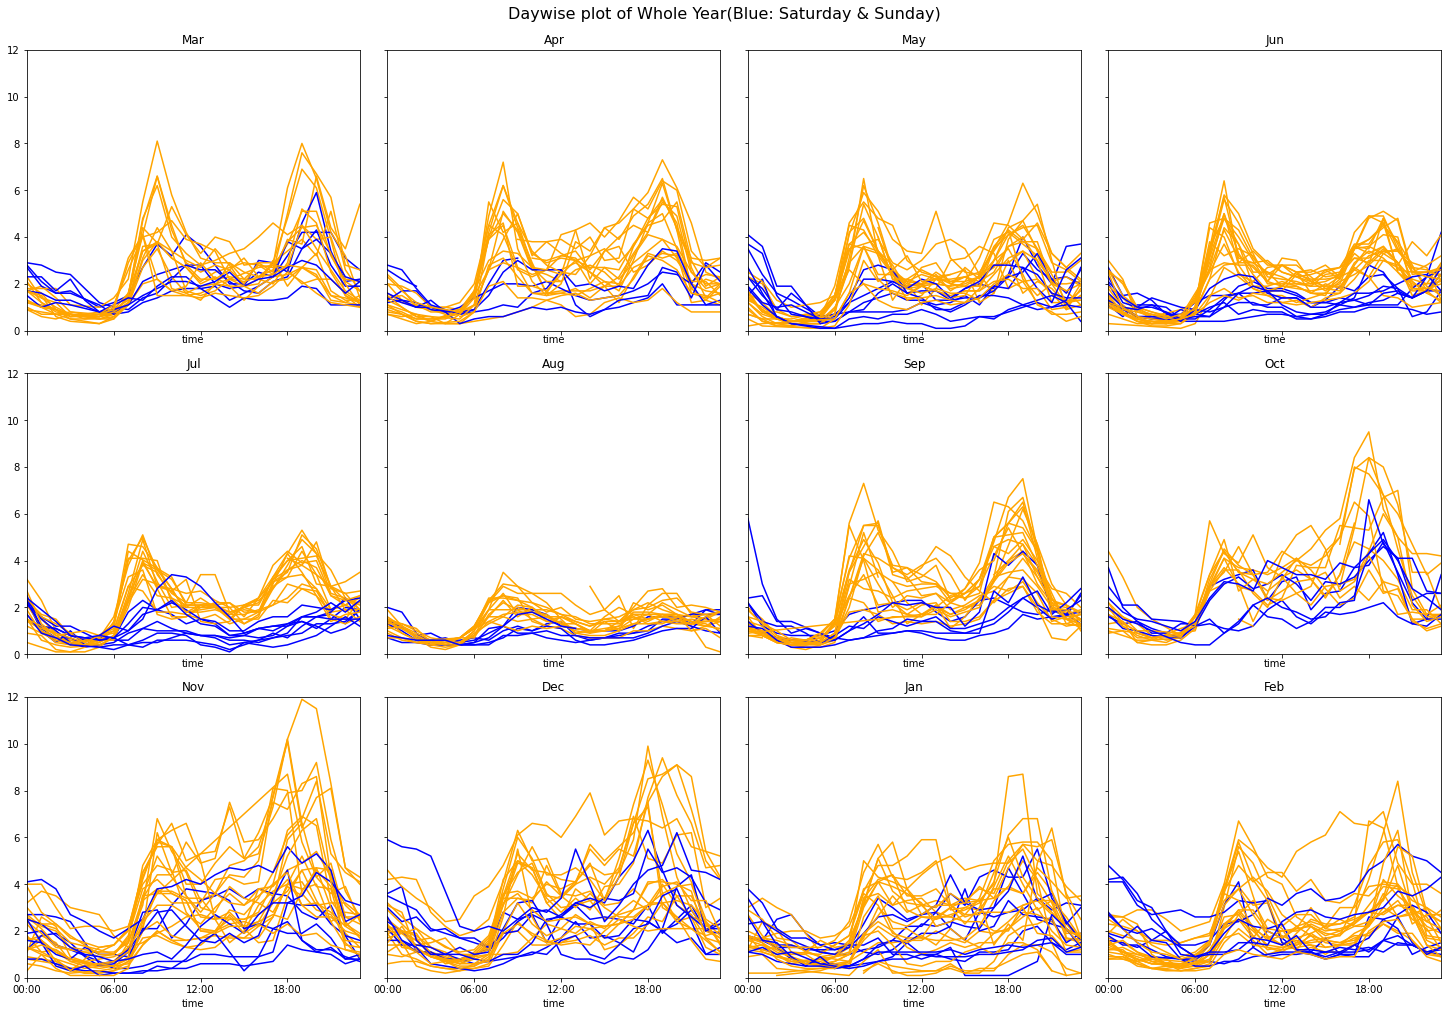

In [19]:
from datetime import datetime
from matplotlib import dates
pd.plotting.register_matplotlib_converters()
fig,ax=plt.subplots(3,4,figsize=(20,14),constrained_layout=True,sharey=True,sharex=True)
Month=df['Date'].dt.month.unique()

i=0
Year=2004
for ax1 in ax:
    for axis in ax1:
        if Month[i]==1:
            Year=2005
        mthdf=df[(df['Date'].dt.month==Month[i])&(df['Date'].dt.year==Year)]

        for date in mthdf['Date'].dt.day.unique():
            if (mthdf[mthdf['Date'].dt.day==date]['Date'].dt.dayofweek.unique()==5) | (mthdf[mthdf['Date'].dt.day==date]['Date'].dt.dayofweek.unique()==6):
                axis.plot(mthdf[mthdf['Date'].dt.day==date]['Time'],mthdf[mthdf['Date'].dt.day==date]['CO(GT)'],color='blue')
            else:
                axis.plot(mthdf[mthdf['Date'].dt.day==date]['Time'],mthdf[mthdf['Date'].dt.day==date]['CO(GT)'],color='orange')
        axis.set_ylim(0,12)
        
        axis.set_xticks(list(df.iloc[[6,11,17,23]]['Time']))
        #axis.set_yticks([])
        axis.set_xlim(df.iloc[[6,28]]['Time'])
        axis.set_title(mthdf.iloc[0]['Date'].strftime("%b"))
        i+=1
fig.suptitle('Daywise plot of Whole Year(Blue: Saturday & Sunday)',fontsize=16)
plt.show()